In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import seaborn as sns

In [2]:
circuits = pd.read_csv('archive/circuits.csv')
race = pd.read_csv('archive/races.csv', parse_dates=['date'])
status = pd.read_csv('archive/status.csv')
result = pd.read_csv('archive/results.csv')
world = pd.read_csv('countries.csv')
constructors = pd.read_csv('archive/constructors.csv')
drivers = pd.read_csv('archive/drivers.csv',parse_dates=['dob'])
sprint = pd.read_csv('archive/sprint_results.csv')

pd.set_option('display.max_columns', 500)

In [3]:
short_result = result[['statusId','raceId','driverId', 'constructorId']]
short_circuit= circuits[['country', 'location', 'circuitId']]
short_race   = race[['raceId', 'circuitId', 'year']]

In [4]:
first_set = pd.merge(short_result, short_race, on='raceId')
sec_set = pd.merge(first_set, short_circuit, on='circuitId')
circuits_by_country_df = pd.merge(sec_set, status, on='statusId')

circuits_by_country = circuits_by_country_df['country'].replace(value='USA', to_replace='United States').reset_index()
circuits_by_country_df#['country'].value_counts()

,statusId,raceId,driverId,constructorId,circuitId,year,country,location,status
0,1,18,1,1,1,2008,Australia,Melbourne,Finished
1,1,18,2,2,1,2008,Australia,Melbourne,Finished
2,1,18,3,3,1,2008,Australia,Melbourne,Finished
3,1,18,4,4,1,2008,Australia,Melbourne,Finished
4,1,18,5,1,1,2008,Australia,Melbourne,Finished
...,...,...,...,...,...,...,...,...,...
26075,107,625,337,66,51,1972,France,Clermont-Ferrand,Eye injury
26076,118,715,356,183,57,1964,Austria,Styria,+29 Laps
26077,135,942,8,6,69,2015,USA,Austin,Brake duct
26078,136,976,815,10,73,2017,Azerbaijan,Baku,Seat


# Circuits by Country - 3 Era

In [5]:
# between_2001_23.groupby(['year','country'])['raceId'].nunique().reset_index().sort_values(by='raceId', ascending=True).tail(20)

In [6]:
# between_2001_23.loc[(between_2001_23['year']==2022) & (between_2001_23['country']=='USA')].raceId.unique()

In [7]:
between_2000_23 = circuits_by_country_df.loc[circuits_by_country_df['year'] >= 2000]
# between_2001_23_df = between_2001_23['country'].replace(value='USA', to_replace='United States').value_counts().reset_index()
between_2000_23[['year', 'country','location','raceId']]#['year'].unique()
greater_then_2000 = between_2000_23.groupby(['year'])['country'].value_counts().reset_index().sort_values(by='country', ascending=False)
circuits_by_country_df.head()

,statusId,raceId,driverId,constructorId,circuitId,year,country,location,status
0,1,18,1,1,1,2008,Australia,Melbourne,Finished
1,1,18,2,2,1,2008,Australia,Melbourne,Finished
2,1,18,3,3,1,2008,Australia,Melbourne,Finished
3,1,18,4,4,1,2008,Australia,Melbourne,Finished
4,1,18,5,1,1,2008,Australia,Melbourne,Finished


In [8]:
greater_then_2000

,year,country,count
208,2012,USA,24
249,2014,USA,18
47,2003,USA,20
61,2004,USA,20
89,2005,USA,20
...,...,...,...
38,2002,Australia,22
274,2016,Australia,22
127,2008,Australia,22
196,2012,Australia,24


In [9]:
circuits_by_country_df.groupby(['raceId', 'year'])['location'].count()

raceId  year
1       2009    20
2       2009    20
3       2009    20
4       2009    20
5       2009    20
                ..
1106    2023    20
1107    2023    20
1108    2023    20
1109    2023    20
1110    2023    20
Name: location, Length: 1091, dtype: int64

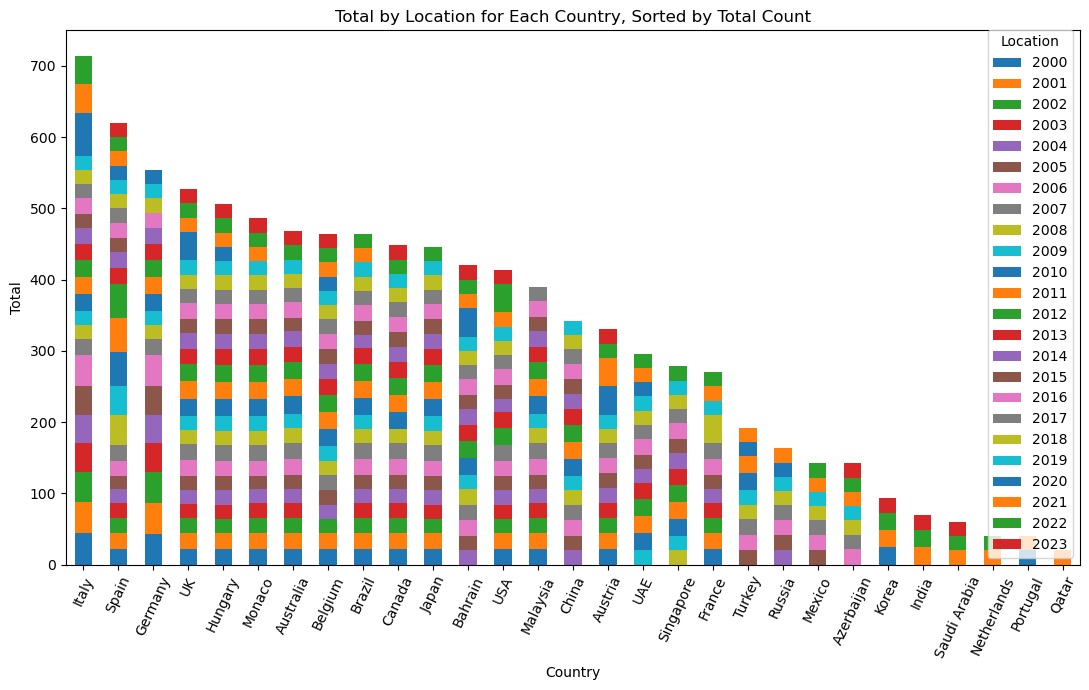

In [10]:
pivot_df = greater_then_2000.pivot(index='country', columns='year', values='count').fillna(0)
# Assuming 'pivot_df' is your pivoted DataFrame from the previous steps

# Calculate the 'Total' for each country by summing across locations (columns)
pivot_df['Total'] = pivot_df.sum(axis=1)

# Sort the DataFrame by 'Total'
pivot_df_sorted = pivot_df.sort_values(by='Total', ascending=False)

# Drop the 'Total' column before plotting, as it's only used for sorting
pivot_df_sorted = pivot_df_sorted.drop(columns=['Total'])

# Now, create the stacked bar plot from the sorted DataFrame
pivot_df_sorted.plot(kind='bar', stacked=True, figsize=(11, 7))

plt.title('Total by Location for Each Country, Sorted by Total Count')
plt.xlabel('Country')
plt.ylabel('Total')
plt.xticks(rotation=65)  # Rotate the country names for better readability
plt.legend(title='Location')
plt.tight_layout()
plt.show()

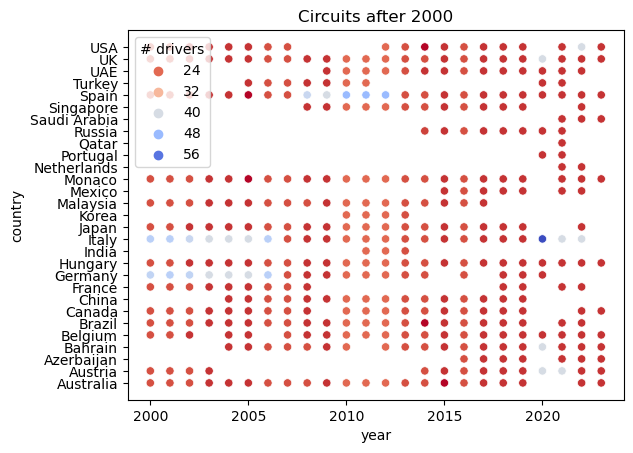

In [11]:
sns.scatterplot(data=greater_then_2000,
                x='year',
                y='country',
                palette='coolwarm_r',
                hue='count'
)
plt.legend(loc='best', title ='# drivers')
plt.title('Circuits after 2000')
plt.show()

In [12]:
between_76_00 = circuits_by_country_df.loc[(circuits_by_country_df['year'] >= 1975)&(circuits_by_country_df['year'] < 2000)]
# between_76_00_df = between_76_00['country'].replace(value='USA', to_replace='United States').value_counts().reset_index()
# between_76_00[['year', 'country','location','raceId']]#['year'].unique()
between_76_00 = between_76_00.groupby(['year'])['country'].value_counts().reset_index().sort_values(by='country', ascending=False)
between_76_00#.info()

,year,country,count
173,1987,USA,26
29,1977,USA,49
126,1984,USA,53
159,1986,USA,26
45,1978,USA,57
...,...,...,...
72,1979,Argentina,26
76,1980,Argentina,28
303,1996,Argentina,22
316,1997,Argentina,22


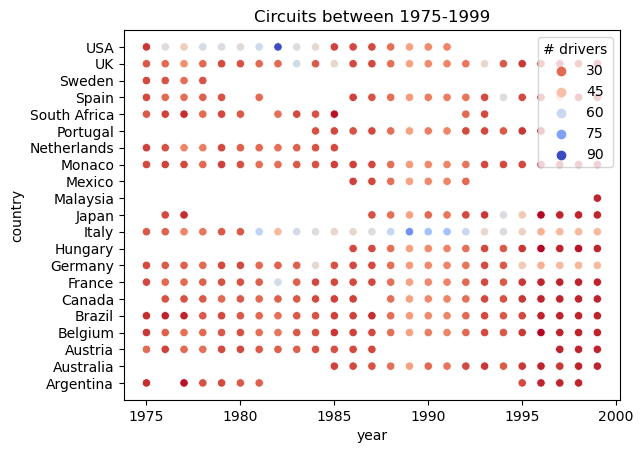

In [13]:
sns.scatterplot(data=between_76_00,
                x='year',
                y='country',
                palette='coolwarm_r',
                hue='count'
)
plt.legend(loc='best', title ='# drivers')
plt.title('Circuits between 1975-1999')
plt.show()

In [14]:
between_50_75 = circuits_by_country_df.loc[circuits_by_country_df['year'] < 1975]
# between_50_75_df = between_50_75['country'].replace(value='USA', to_replace='United States').value_counts().reset_index()
# between_50_75[['year', 'country','location','raceId']]#['year'].unique()
between_50_75 = between_50_75.groupby(['year'])['country'].value_counts().reset_index().sort_values(by='country', ascending=False)
between_50_75#.info()

,year,country,count
0,1950,USA,35
23,1953,USA,47
42,1955,USA,35
48,1956,USA,34
57,1957,USA,33
...,...,...,...
231,1973,Argentina,19
54,1956,Argentina,16
61,1957,Argentina,17
216,1972,Argentina,22


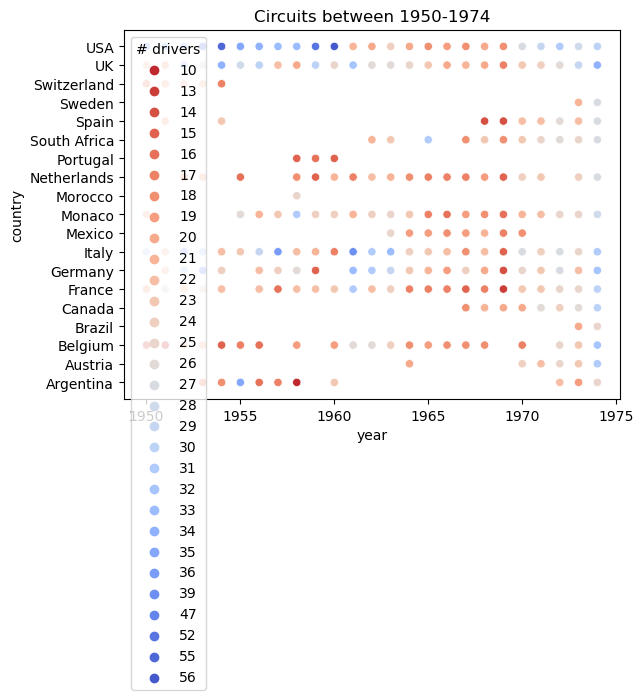

In [15]:
sns.scatterplot(data=between_50_75,
                x='year',
                y='country',
                palette=sns.color_palette('coolwarm_r', 30),
                hue='count'
)
# sns.color_palette('pastel')
plt.legend(loc='best', title ='# drivers')
plt.title('Circuits between 1950-1974')
plt.show()

In [16]:
new_50_75 = circuits_by_country_df.loc[circuits_by_country_df['year'] < 1975]
# new_50_75 = new_50_75['country'].replace(value='USA', to_replace='United States').value_counts().reset_index()
# # new_50_75[['year', 'country','location','raceId']]#['year'].unique()
new_50_75 = new_50_75[['driverId', 'raceId']].groupby('raceId').count()
new_50_75.describe()#.info()

,driverId
count,250.000000
mean,23.116000
std,5.900662
min,10.000000
25%,19.000000
50%,22.000000
75%,26.000000
max,55.000000


<Axes: >

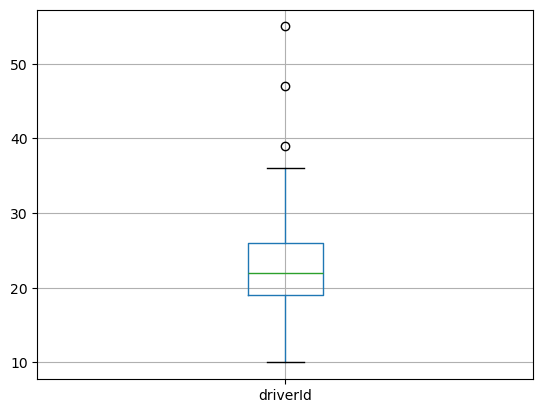

In [17]:
new_50_75.boxplot()

In [18]:
new_50_75.describe()

,driverId
count,250.000000
mean,23.116000
std,5.900662
min,10.000000
25%,19.000000
50%,22.000000
75%,26.000000
max,55.000000


In [19]:
new_75_00 = circuits_by_country_df.loc[(circuits_by_country_df['year'] >= 1975) & (circuits_by_country_df['year'] < 2000)]
# new_50_75 = new_50_75['country'].replace(value='USA', to_replace='United States').value_counts().reset_index()
# # new_50_75[['year', 'country','location','raceId']]#['year'].unique()
new_75_00 = new_75_00[['driverId', 'raceId']].groupby('raceId').count()
new_75_00.describe()#.info()

,driverId
count,396.000000
mean,27.527778
std,4.317376
min,14.000000
25%,25.000000
50%,27.000000
75%,30.000000
max,39.000000


<Axes: >

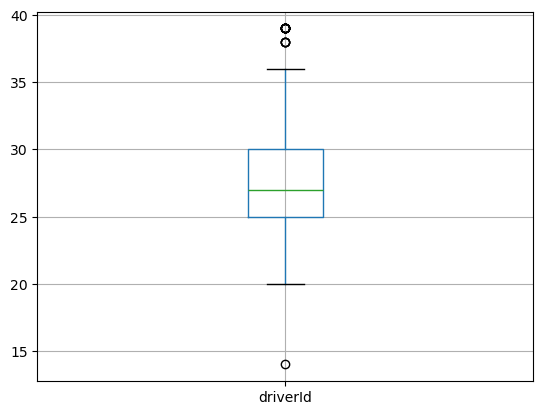

In [20]:
new_75_00.boxplot()

In [21]:
new_00_23 = circuits_by_country_df.loc[circuits_by_country_df['year'] >= 2000]
circuits_by_country_df
new_00_23 = new_00_23[['driverId', 'raceId']].groupby('raceId').count()
new_00_23.describe()

,driverId
count,445.000000
mean,21.123596
std,1.453640
min,18.000000
25%,20.000000
50%,20.000000
75%,22.000000
max,24.000000


<Axes: >

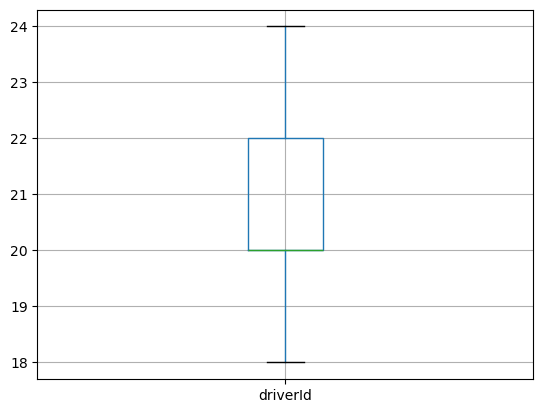

In [22]:
new_00_23.boxplot()

In [23]:
new_75_00.reset_index()

,raceId,driverId
0,175,22
1,176,22
2,177,22
3,178,22
4,179,22
...,...,...
391,585,28
392,586,26
393,587,30
394,588,28


In [24]:
new_50_75.reset_index(inplace=True)
new_50s =new_50_75[['driverId']].rename(columns={'driverId': '1950-1974'})


In [25]:
new_50s

,1950-1974
0,25
1,25
2,27
3,27
4,32
...,...
245,35
246,18
247,14
248,20


In [26]:
new_75_00.reset_index(inplace=True)
new_75th =new_75_00[['driverId']].rename(columns={'driverId': '1975-1999'})


In [27]:
new_75th

,1975-1999
0,22
1,22
2,22
3,22
4,22
...,...
391,28
392,26
393,30
394,28


In [28]:
new_00_23.reset_index(inplace=True)
new_000 = new_00_23[['driverId']].rename(columns={'driverId': '2000-2023'})


In [29]:
new_000

,2000-2023
0,20
1,20
2,20
3,20
4,20
...,...
440,20
441,20
442,20
443,20


In [30]:
box =pd.concat([new_50s, new_75th, new_000], axis=1)

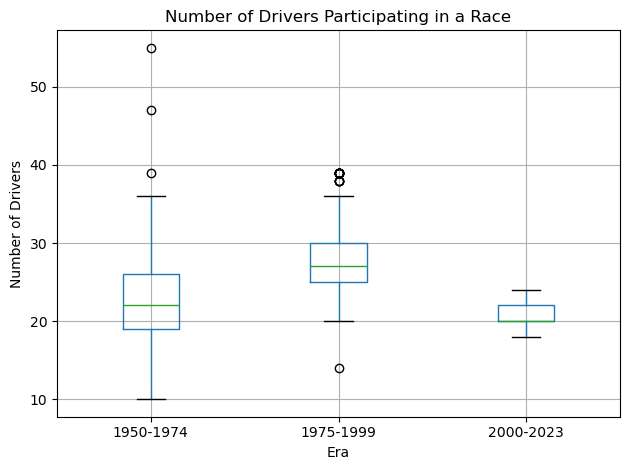

In [31]:
box.boxplot()
plt.title('Number of Drivers Participating in a Race')
plt.xlabel('Era')
plt.ylabel('Number of Drivers')
# plt.xticks(rotation=65)  # Rotate the country names for better readability
plt.tight_layout()  # Adjust layout to fit all labels
plt.show()

In [32]:
box.describe()

,1950-1974,1975-1999,2000-2023
count,250.000000,396.000000,445.000000
mean,23.116000,27.527778,21.123596
std,5.900662,4.317376,1.453640
min,10.000000,14.000000,18.000000
25%,19.000000,25.000000,20.000000
50%,22.000000,27.000000,20.000000
75%,26.000000,30.000000,22.000000
max,55.000000,39.000000,24.000000


# Race and Circuit ~~~

In [33]:
circuit_year = pd.merge(race, circuits, on='circuitId')
short_circuit_year = circuit_year[['raceId', 'year', 'country']]
short_circuit_year.groupby(['year'])['country'].value_counts().reset_index()

,year,country,count
0,1950,Belgium,1
1,1950,Italy,1
2,1950,Monaco,1
3,1950,Switzerland,1
4,1950,UK,1
...,...,...,...
1021,2023,Singapore,1
1022,2023,Spain,1
1023,2023,UAE,1
1024,2023,UK,1


In [34]:
another_try = short_circuit_year.loc[short_circuit_year['year'] <= 1975]
another_try.groupby(['country'])['year'].count().reset_index().sort_values(by='year', ascending=False)

,country,year
18,USA,28
7,Italy,27
17,UK,26
5,France,25
6,Germany,23
9,Monaco,22
2,Belgium,22
11,Netherlands,20
13,South Africa,12
0,Argentina,11


In [35]:
# # num_circuits_by_country = circuits['country'].replace(value='USA', to_replace='United States').value_counts()
# plt.figure(figsize=(11, 6))  # Set the figure size as needed
# num_of_circuits = sns.barplot(x=another_try['country'], y=another_try['count'], palette="coolwarm")
# # cir_by_country.plot(kind='bar')
# for bar in num_of_circuits.patches:
#     num_of_circuits.text(
#         bar.get_x() + bar.get_width() / 2, 
#         bar.get_height(), 
#         round(bar.get_height()), 
#         ha='center', 
#         va='bottom'
#     )
# plt.title('Number Of Circuits In Country (full history)')
# plt.xlabel('Countries')
# plt.ylabel('Number of circuits')
# plt.xticks(rotation=65)  # Rotate the country names for better readability
# plt.tight_layout()  # Adjust layout to fit all labels
# plt.show()

# Drivers Nationality - 3 Era

In [36]:
print(drivers.shape)
drivers.sample() # driverId forename surname nationality

(857, 9)


,driverId,driverRef,number,code,forename,surname,dob,nationality,url
195,196,boesel,\N,\N,Raul,Boesel,1957-12-04,Brazilian,http://en.wikipedia.org/wiki/Raul_Boesel


In [37]:
print(circuits.shape)
circuits.sample() # circuitId location country

(77, 9)


,circuitId,circuitRef,name,location,country,lat,lng,alt,url
26,27,estoril,Autódromo do Estoril,Estoril,Portugal,38.7506,-9.39417,130,http://en.wikipedia.org/wiki/Aut%C3%B3dromo_do...


In [38]:
print(race.shape)
race.sample() # raceId	year circuitId	name date

(1101, 18)


,raceId,year,round,circuitId,name,date,time,url,fp1_date,fp1_time,fp2_date,fp2_time,fp3_date,fp3_time,quali_date,quali_time,sprint_date,sprint_time
86,87,2005,17,18,Brazilian Grand Prix,2005-09-25,14:00:00,http://en.wikipedia.org/wiki/2005_Brazilian_Gr...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N


In [39]:
print(result.shape)
result.sample() # resultId	raceId	driverId constructorId points

(26080, 18)


,resultId,raceId,driverId,constructorId,number,grid,position,positionText,positionOrder,points,laps,time,milliseconds,fastestLap,rank,fastestLapTime,fastestLapSpeed,statusId
14477,14478,588,252,202,16,14,6,6,6,1.0,52,+1:15.9,5038500,\N,\N,\N,\N,1


In [40]:
result_race = pd.merge(result, race, on='raceId')
race_result_circuit = pd.merge(result_race, circuits, on='circuitId')
driver_result = pd.merge(race_result_circuit, drivers, on='driverId')
driver_result.sample()

,resultId,raceId,driverId,constructorId,number_x,grid,position,positionText,positionOrder,points,laps,time_x,milliseconds,fastestLap,rank,fastestLapTime,fastestLapSpeed,statusId,year,round,circuitId,name_x,date,time_y,url_x,fp1_date,fp1_time,fp2_date,fp2_time,fp3_date,fp3_time,quali_date,quali_time,sprint_date,sprint_time,circuitRef,name_y,location,country,lat,lng,alt,url_y,driverRef,number_y,code,forename,surname,dob,nationality,url
8783,20881,845,815,15,17,12,9,9,9,2.0,65,\N,\N,55,6,1:27.247,192.075,11,2011,5,4,Spanish Grand Prix,2011-05-22,12:00:00,http://en.wikipedia.org/wiki/2011_Spanish_Gran...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N,catalunya,Circuit de Barcelona-Catalunya,Montmeló,Spain,41.57,2.26111,109,http://en.wikipedia.org/wiki/Circuit_de_Barcel...,perez,11,PER,Sergio,Pérez,1990-01-26,Mexican,http://en.wikipedia.org/wiki/Sergio_P%C3%A9rez


In [41]:
driver_result.sample()

,resultId,raceId,driverId,constructorId,number_x,grid,position,positionText,positionOrder,points,laps,time_x,milliseconds,fastestLap,rank,fastestLapTime,fastestLapSpeed,statusId,year,round,circuitId,name_x,date,time_y,url_x,fp1_date,fp1_time,fp2_date,fp2_time,fp3_date,fp3_time,quali_date,quali_time,sprint_date,sprint_time,circuitRef,name_y,location,country,lat,lng,alt,url_y,driverRef,number_y,code,forename,surname,dob,nationality,url
478,1644,96,2,17,18,13,10,10,10,0.0,59,\N,\N,55,11,1:32.121,201.178,11,2004,7,20,European Grand Prix,2004-05-30,\N,http://en.wikipedia.org/wiki/2004_European_Gra...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N,nurburgring,Nürburgring,Nürburg,Germany,50.3356,6.9475,578,http://en.wikipedia.org/wiki/N%C3%BCrburgring,heidfeld,\N,HEI,Nick,Heidfeld,1977-05-10,German,http://en.wikipedia.org/wiki/Nick_Heidfeld


In [42]:
parts_drivers_result = driver_result[['raceId', 'driverId' ,'forename' ,'surname', 'nationality', 'year']]

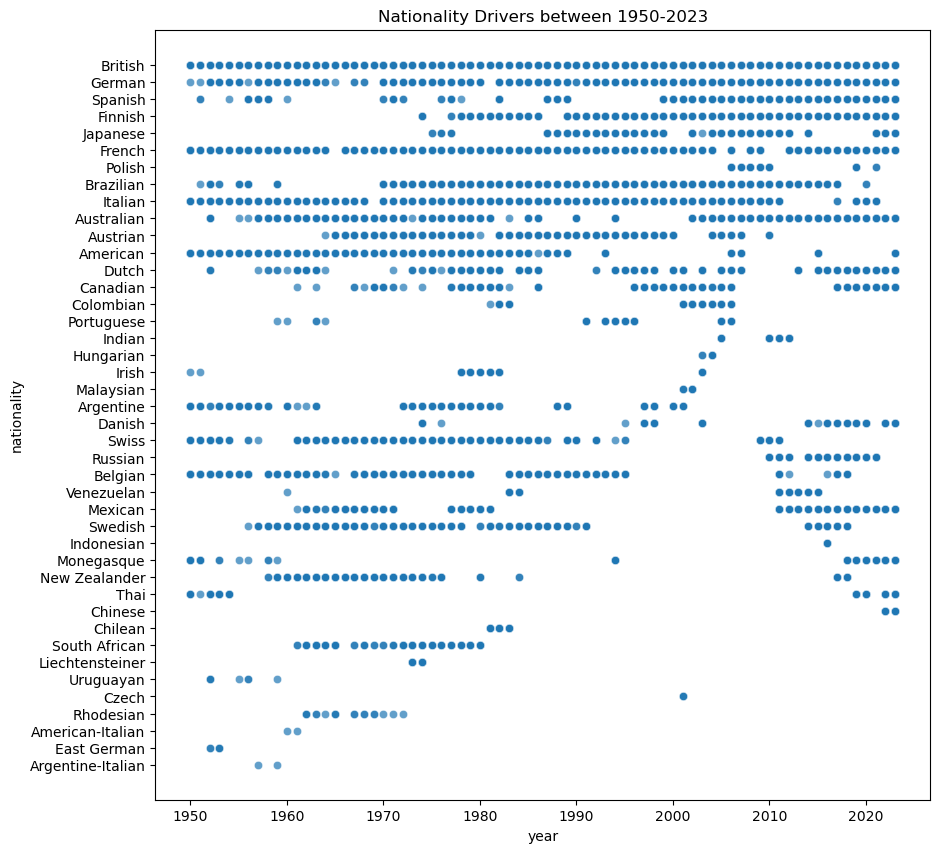

In [43]:
# parts_drivers_result
plt.figure(figsize=(10,10))
sns.scatterplot(data=parts_drivers_result,#.sort_values('nationality', ascending=False),
                x='year',
                y='nationality',
                # palette=sns.color_palette('husl'),
                # sizes=(20,200),
                # size='count',
                # hue='count',
                alpha=0.7
                # style='count'
)
# sns.color_palette('pastel')
# plt.legend(loc='best', title ='# drivers')
plt.title('Nationality Drivers between 1950-2023')
plt.show()

In [44]:
drivers_before_75 = parts_drivers_result.loc[parts_drivers_result['year'] <= 1975]
# drivers_before_75_df = drivers_before_75.groupby(['raceId'])['nationality'].count().reset_index().sort_values(by='nationality', ascending=False).head(20)
drivers_before_75_df = drivers_before_75.groupby(['year'])['nationality'].value_counts().reset_index().sort_values(by='count', ascending=False)
drivers_before_75_df

,year,nationality,count
338,1974,British,99
97,1958,British,91
322,1973,British,88
140,1961,British,87
227,1967,British,82
...,...,...,...
337,1973,Australian,1
135,1960,Dutch,1
124,1959,Argentine-Italian,1
123,1959,Uruguayan,1


In [45]:
driver_count = drivers_before_75.groupby(['raceId', "year"])['nationality'].value_counts().reset_index().sort_values(by='count', ascending=False)
driver_count
# drivers_before_75['raceId'].unique()

,raceId,year,nationality,count
2262,800,1954,American,55
2320,809,1953,American,47
2225,794,1955,American,35
2513,835,1950,American,35
2448,826,1951,American,34
...,...,...,...,...
1113,666,1969,Mexican,1
1108,665,1969,Canadian,1
1107,665,1969,Mexican,1
1106,665,1969,Belgian,1


/var/folders/dq/lfhw90y53plczdyg_s9ch5q40000gn/T/ipykernel_25873/2183128491.py:1: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(data=drivers_before_75_df,


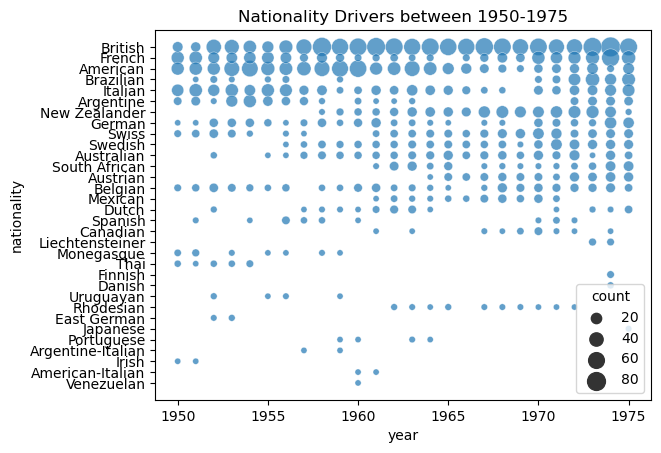

In [46]:
sns.scatterplot(data=drivers_before_75_df,
                x='year',
                y='nationality',
                palette=sns.color_palette('husl'),
                sizes=(20,200),
                size='count',
                # hue='count',
                alpha=0.7
                # style='count'
)
# sns.color_palette('pastel')
# plt.legend(loc='best', title ='# drivers')
plt.title('Nationality Drivers between 1950-1975')
plt.show()

In [47]:
drivers_after_75 = parts_drivers_result.loc[(parts_drivers_result['year'] >= 1975) & (parts_drivers_result['year'] < 2000)]#(accident['year'] >= 1975)&(accident['year'] < 2000)
# drivers_before_75_df = drivers_before_75.groupby(['raceId'])['nationality'].count().reset_index().sort_values(by='nationality', ascending=False).head(20)
drivers_after_75_df = drivers_after_75.groupby(['year'])['nationality'].value_counts().reset_index().sort_values(by='count', ascending=False)
drivers_after_75_df

,year,nationality,count
235,1990,Italian,214
221,1989,Italian,189
247,1991,Italian,185
209,1988,Italian,171
258,1992,Italian,136
...,...,...,...
122,1981,Colombian,1
32,1976,Danish,1
33,1976,Dutch,1
196,1986,American,1


/var/folders/dq/lfhw90y53plczdyg_s9ch5q40000gn/T/ipykernel_25873/3485387192.py:1: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(data=drivers_after_75_df,


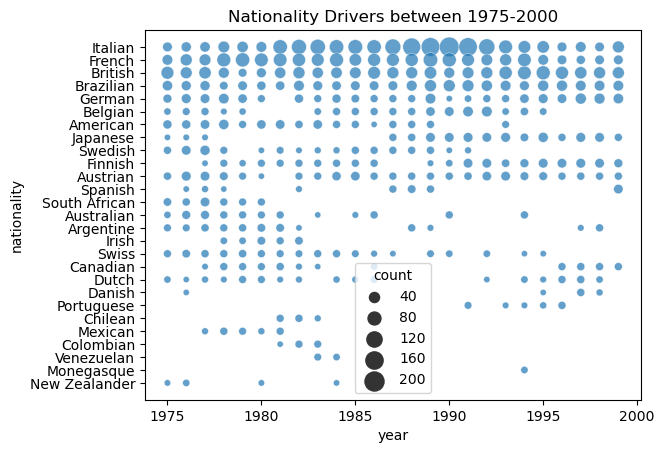

In [48]:
sns.scatterplot(data=drivers_after_75_df,
                x='year',
                y='nationality',
                palette=sns.color_palette('husl'),
                sizes=(20,200),
                size='count',
                # hue='count',
                alpha=0.7,
                # style='count'
)
# sns.color_palette('pastel')
# plt.legend(loc='best', title ='# drivers')
plt.title('Nationality Drivers between 1975-2000')
plt.show()

In [49]:
def plot_nationality(df, years):
    df_groupby = df.groupby(['year'])['nationality'].value_counts().reset_index().sort_values(by='count', ascending=False)
    sns.scatterplot(data=df_groupby,
                x='year',
                y='nationality',
                palette=sns.color_palette('husl'),
                sizes=(20,200),
                size='count',
                # hue='count',
                alpha=0.7,
                # style='count',
                
    )
    # sns.color_palette('pastel')
    plt.legend(loc='best', title ='# drivers')
    plt.title(f'# Of Drivers By Nationality Between {years}')
    plt.show()

/var/folders/dq/lfhw90y53plczdyg_s9ch5q40000gn/T/ipykernel_25873/2455054758.py:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(data=df_groupby,


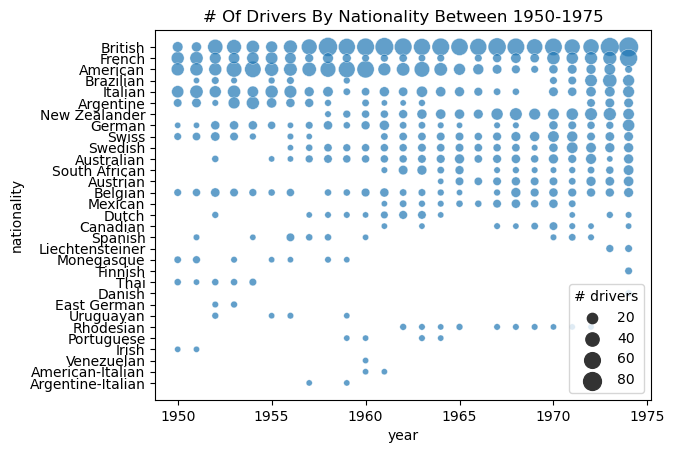

In [50]:
plot_nationality(parts_drivers_result.loc[parts_drivers_result['year'] < 1975], '1950-1975')

/var/folders/dq/lfhw90y53plczdyg_s9ch5q40000gn/T/ipykernel_25873/2455054758.py:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(data=df_groupby,


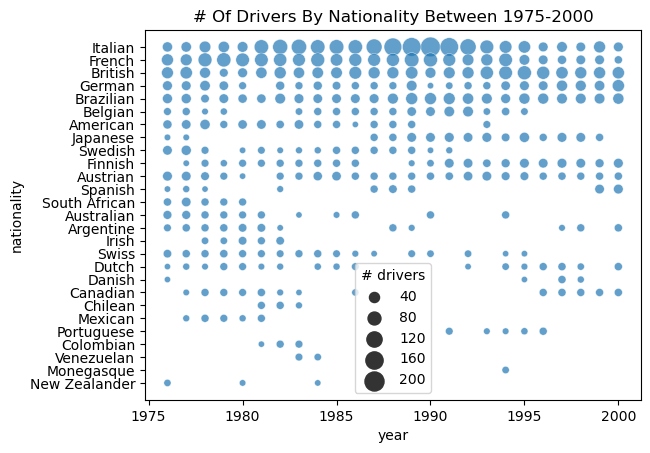

In [51]:
plot_nationality(parts_drivers_result.loc[(parts_drivers_result['year'] > 1975) & (parts_drivers_result['year'] <= 2000)], '1975-2000')

/var/folders/dq/lfhw90y53plczdyg_s9ch5q40000gn/T/ipykernel_25873/2455054758.py:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(data=df_groupby,


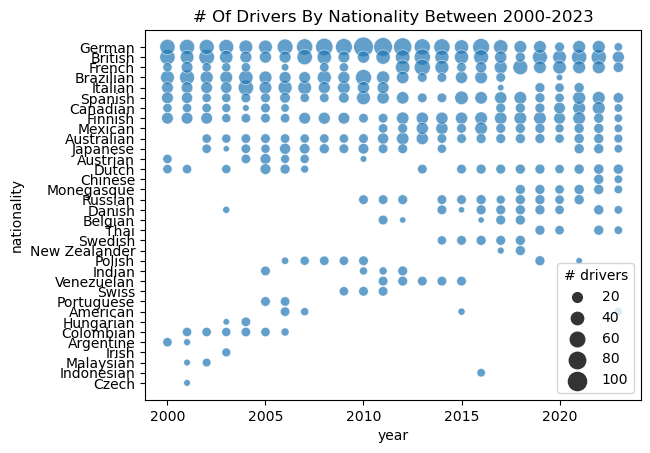

In [52]:
plot_nationality(parts_drivers_result.loc[parts_drivers_result['year'] >= 2000], '2000-2023')

In [53]:
drivers_after_00 = parts_drivers_result.loc[parts_drivers_result['year'] >= 2000]
# drivers_before_75_df = drivers_before_75.groupby(['raceId'])['nationality'].count().reset_index().sort_values(by='nationality', ascending=False).head(20)
drivers_after_00_df = drivers_after_00.groupby(['year'])['nationality'].value_counts().reset_index().sort_values(by='count', ascending=False)
drivers_after_00_df

,year,nationality,count
127,2010,German,119
140,2011,German,106
154,2012,German,100
106,2008,German,90
204,2016,German,84
...,...,...,...
278,2020,Brazilian,2
217,2016,Belgian,1
166,2012,Belgian,1
50,2003,Japanese,1


/var/folders/dq/lfhw90y53plczdyg_s9ch5q40000gn/T/ipykernel_25873/3372962952.py:1: UserWarning: 
The palette list has fewer values (6) than needed (70) and will cycle, which may produce an uninterpretable plot.
  sns.scatterplot(data=drivers_after_00_df,


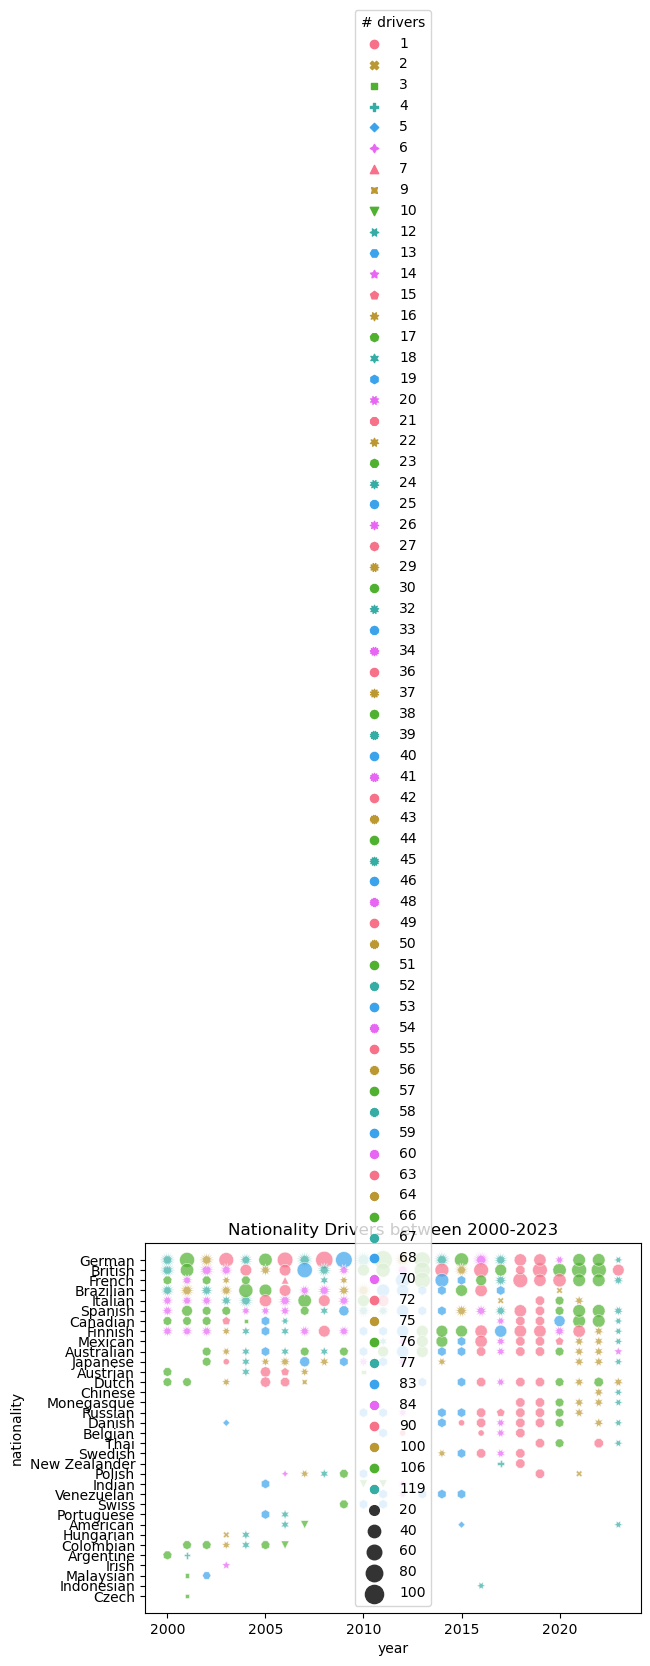

In [54]:
sns.scatterplot(data=drivers_after_00_df,
                x='year',
                y='nationality',
                palette=sns.color_palette('husl'),
                sizes=(20,200),
                size='count',
                hue='count',
                alpha=0.7,
                style='count'
)
# sns.color_palette('pastel')
plt.legend(loc='best', title ='# drivers')
plt.title('Nationality Drivers between 2000-2023')
plt.show()

# Drivers Points by Era

In [55]:
drivers_result_points = driver_result[['raceId', 'driverId' ,'forename' ,'surname', 'nationality', 'year','points']]
drivers_result_points.sample()

,raceId,driverId,forename,surname,nationality,year,points
18261,483,202,Didier,Pironi,French,1981,0.0


In [56]:
d_points_1950 = drivers_result_points.loc[drivers_result_points['year'] < 1975]
d_points_1950 = d_points_1950.groupby(['nationality'])['points'].sum().reset_index().sort_values(by='points', ascending=False)
d_points_1950

,nationality,points
8,British,1884.14
0,American,755.00
17,Italian,604.16
21,New Zealander,535.50
2,Argentine,439.92
14,French,379.33
4,Australian,268.00
7,Brazilian,226.50
6,Belgian,219.00
27,Swiss,205.00


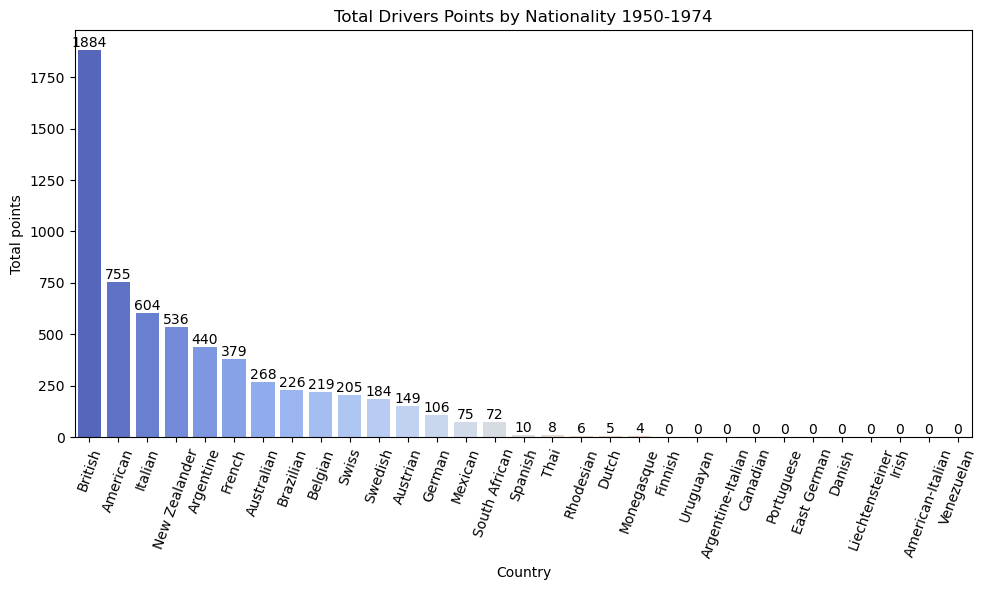

In [57]:
plt.figure(figsize=(10, 6))  # Set the figure size as needed
 
ax = sns.barplot(x=d_points_1950['nationality'], y=d_points_1950['points'] ,palette="coolwarm")

for bar in ax.patches:
    ax.text(
        bar.get_x() + bar.get_width() / 2, 
        bar.get_height(), 
        round(bar.get_height()), 
        ha='center', 
        va='bottom'
    )
plt.title('Total Drivers Points by Nationality 1950-1974')
plt.xlabel('Country')
plt.ylabel('Total points')
plt.xticks(rotation=70)  # Rotate the country names for better readability
plt.tight_layout()  # Adjust layout to fit all labels
plt.show()

In [58]:
d_points_75_00 = drivers_result_points.loc[(drivers_result_points['year'] >= 1975) & (drivers_result_points['year'] < 2000)]
d_points_75_00 = d_points_75_00.groupby(['nationality'])['points'].sum().reset_index().sort_values(by='points', ascending=False)
d_points_75_00

,nationality,points
13,French,1916.0
6,British,1885.0
5,Brazilian,1343.5
16,Italian,928.0
14,German,880.0
3,Austrian,803.5
12,Finnish,488.5
7,Canadian,287.0
1,Argentine,259.0
0,American,243.0


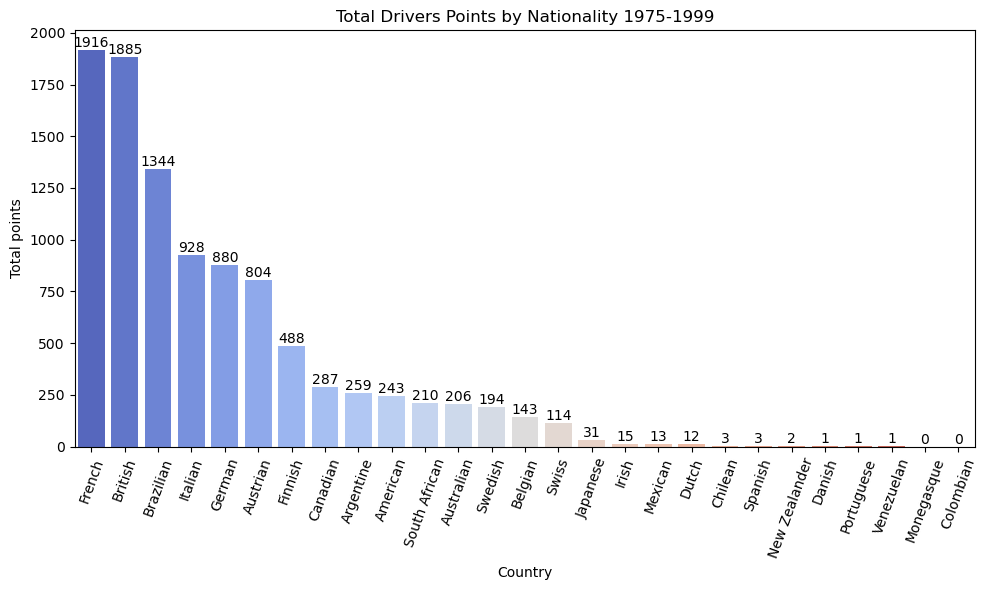

In [59]:
plt.figure(figsize=(10, 6))  # Set the figure size as needed
 
ax = sns.barplot(x=d_points_75_00['nationality'], y=d_points_75_00['points'] ,palette="coolwarm")

for bar in ax.patches:
    ax.text(
        bar.get_x() + bar.get_width() / 2, 
        bar.get_height(), 
        round(bar.get_height()), 
        ha='center', 
        va='bottom'
    )
plt.title('Total Drivers Points by Nationality 1975-1999')
plt.xlabel('Country')
plt.ylabel('Total points')
plt.xticks(rotation=70)  # Rotate the country names for better readability
plt.tight_layout()  # Adjust layout to fit all labels
plt.show()

In [60]:
d_points_00 = drivers_result_points.loc[drivers_result_points['year'] >= 2000]
d_points_00 = d_points_00.groupby(['nationality'])['points'].sum().reset_index().sort_values(by='points', ascending=False)
d_points_00

,nationality,points
6,British,7099.5
15,German,6966.5
13,Finnish,3895.0
29,Spanish,3112.5
2,Australian,2381.5
12,Dutch,2287.5
5,Brazilian,1853.0
23,Mexican,1367.0
14,French,1217.0
24,Monegasque,939.0


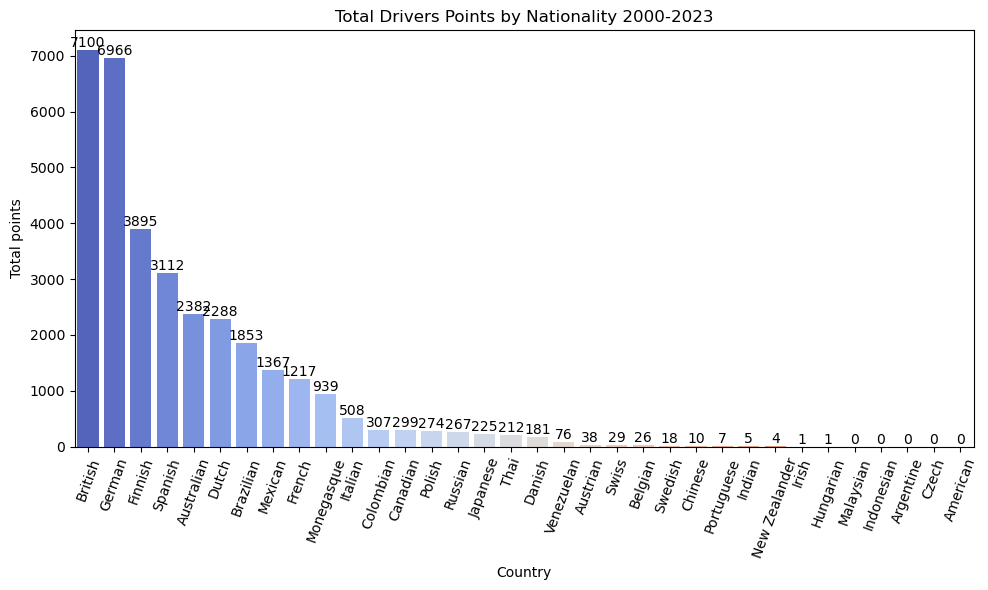

In [61]:
plt.figure(figsize=(10, 6))  # Set the figure size as needed
 
ax = sns.barplot(x=d_points_00['nationality'], y=d_points_00['points'] ,palette="coolwarm")

for bar in ax.patches:
    ax.text(
        bar.get_x() + bar.get_width() / 2, 
        bar.get_height(), 
        round(bar.get_height()), 
        ha='center', 
        va='bottom'
    )
plt.title('Total Drivers Points by Nationality 2000-2023')
plt.xlabel('Country')
plt.ylabel('Total points')
plt.xticks(rotation=70)  # Rotate the country names for better readability
plt.tight_layout()  # Adjust layout to fit all labels
plt.show()

In [62]:
driver_score_df = driver_result.groupby(['nationality'])['points'].sum().reset_index().sort_values('points',ascending=False).head(12)
driver_score_df.sample()

,nationality,points
18,French,3512.33


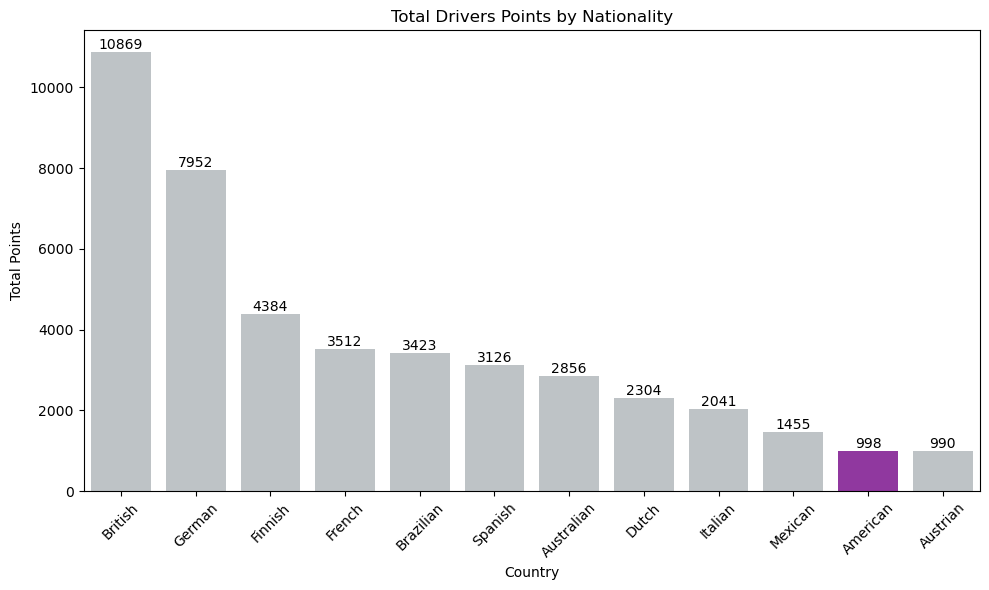

In [63]:
colors=['#BDC3C7','#BDC3C7','#BDC3C7','#BDC3C7','#BDC3C7','#BDC3C7','#BDC3C7','#BDC3C7','#BDC3C7','#BDC3C7','#9C27B0','#BDC3C7']#,'#A3E4D7','#A3E4D7','#A3E4D7']#,'#58D68D','#AED6F1','#CB4335','#009B3A']
plt.figure(figsize=(10, 6))  # Set the figure size as needed
 
ax = sns.barplot(x=driver_score_df['nationality'], y=driver_score_df['points'] ,palette=colors)

for bar in ax.patches:
    ax.text(
        bar.get_x() + bar.get_width() / 2, 
        bar.get_height(), 
        round(bar.get_height()), 
        ha='center', 
        va='bottom'
    )
plt.title('Total Drivers Points by Nationality')
plt.xlabel('Country')
plt.ylabel('Total Points')
plt.xticks(rotation=45)  # Rotate the country names for better readability
plt.tight_layout()  # Adjust layout to fit all labels
plt.show()

In [64]:
d_points_00 = drivers_result_points.loc[drivers_result_points['year'] > 2000]
d_points_00.loc[d_points_00['nationality'] == 'American']#['points'].sum()

,raceId,driverId,forename,surname,nationality,year,points
4561,36,26,Scott,Speed,American,2007,0.0
4562,55,26,Scott,Speed,American,2006,0.0
4563,37,26,Scott,Speed,American,2007,0.0
4564,54,26,Scott,Speed,American,2006,0.0
4565,38,26,Scott,Speed,American,2007,0.0
4566,53,26,Scott,Speed,American,2006,0.0
4567,39,26,Scott,Speed,American,2007,0.0
4568,58,26,Scott,Speed,American,2006,0.0
4569,66,26,Scott,Speed,American,2006,0.0
4570,40,26,Scott,Speed,American,2007,0.0


In [65]:
total_driver_points = drivers_result_points.groupby(['year','nationality'])[['points']].sum().reset_index().sort_values('points',ascending=False)


In [66]:
colors=['#85C1E9','#CB4335','#009B3A','#AED6F1','#F1948A',
        '#F5B041','#0000CC','#4FC3F7','#58D68D','#FF9900',
        '#9C27B0','#F44336','#B2BABB','#007A4D','#A3E4D7']
#85C1E9: UK - Soft Sky Blue
#CB4335: GERMANY - Rich Brick Red
#009B3A: BRAZIL - Vibrant Emerald Green
#AED6F1: ARGENTINA - Light Cornflower Blue
#F1948A: FRANCE - Salmon Pink
#F5B041: AUSTRALIA - Bold Sunflower Yellow
#0000CC: AUSTRIA - Classic Royal Blue
#4FC3F7: FINLAND - Bright Cerulean
#58D68D: ITALY - Light Sea Green
#FF9900: NETHERLAND - Vivid Orange Peel
#9C27B0: USA - Deep Purple
#F44336: SPAIN - Bright Coral Red
#B2BABB: NEW ZEALAND - Cool Gray
#007A4D: SOUTH AFRICA - Dark Jungle Green
#A3E4D7: CANADA - Pale Turquoise

In [67]:
def plot_points_by_nationality(era, years, large, color1, color2, color3, color4=None):
    plt.figure(figsize=(6,7))  # Set the figure size as needed

    df = era.groupby('nationality')['points'].sum().reset_index().\
                                sort_values('points',ascending=False)\
                                .nlargest(large,'points')
    ax = sns.barplot(x=df['nationality'], y=df['points'] ,palette=[color1, color2, color3, color4])
    
    for bar in ax.patches:
        ax.text(
            bar.get_x() + bar.get_width() / 2, 
            bar.get_height(), 
            round(bar.get_height()), 
            ha='center', 
            va='bottom'
        )
    plt.title(f'Drivers Points by Nationality {years}')
    plt.xlabel('Nationality')
    plt.ylabel('Sum Points')
    plt.xticks(rotation=45)  # Rotate the country names for better readability
    plt.tight_layout()  # Adjust layout to fit all labels
    plt.show()

In [68]:
# def plot_points_by_nationality(era, years, large, color1, color2, color3, color4=None):
#     total_driver_points_loc = era
#     total_driver_points_loc.groupby('nationality')['points'].sum().reset_index().\
#                             sort_values('points',ascending=False)\
#                             .nlargest(large,'points').plot(kind='bar', x='nationality')
#     plt.title(f'Drivers Points by Nationality {years}')
    
#     plt.xticks(rotation=45)
#     plt.xlabel('Nationality')
#     plt.ylabel('Sum Points')
#     plt.xticks(rotation=45)  # Rotate the country names for better readability
#     plt.tight_layout()  # Adjust layout to fit all labels
#     plt.legend().remove()
#     plt.show()

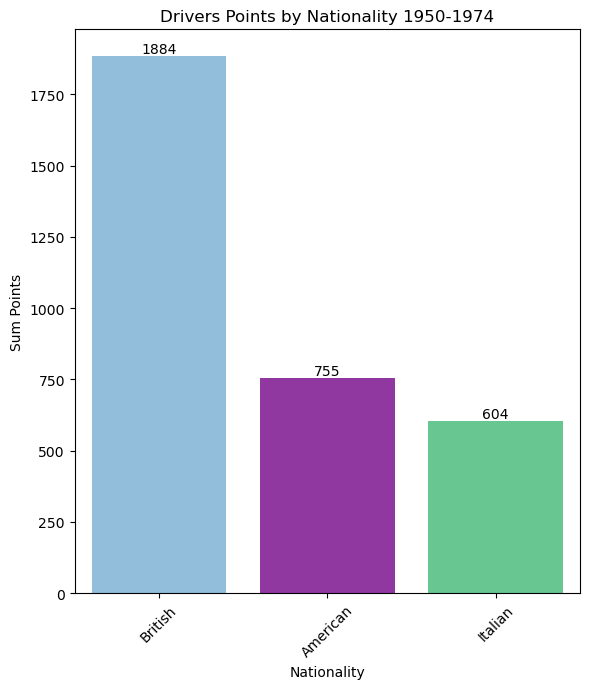

In [69]:
plot_points_by_nationality(total_driver_points.loc[total_driver_points['year'] < 1975], "1950-1974", 3, '#85C1E9','#9C27B0','#58D68D')


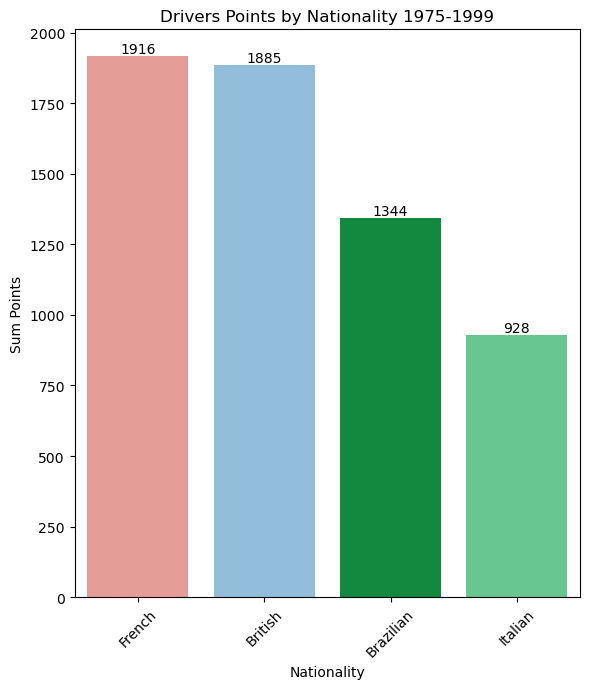

In [70]:
plot_points_by_nationality(total_driver_points.loc[(total_driver_points['year'] >= 1975) & (total_driver_points['year'] < 2000)], "1975-1999", 4,'#F1948A','#85C1E9','#009B3A','#58D68D')


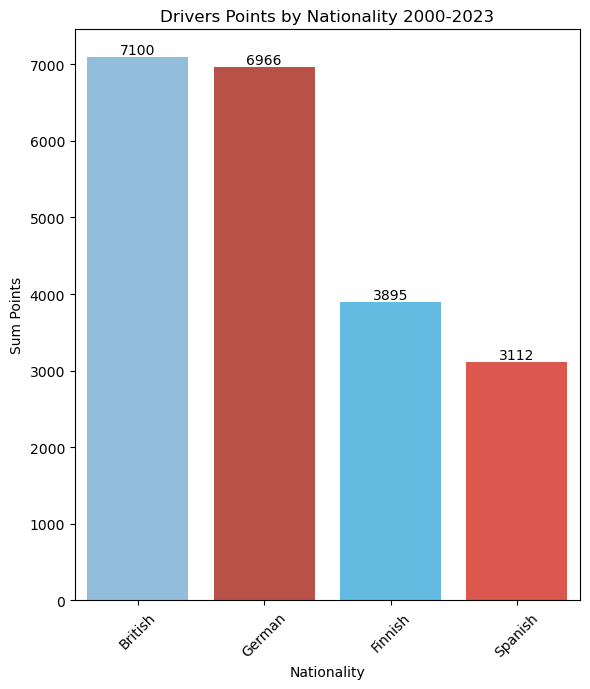

In [71]:
plot_points_by_nationality(total_driver_points.loc[total_driver_points['year'] >= 2000], "2000-2023", 4,'#85C1E9' ,'#CB4335','#4FC3F7','#F44336')

# Accidents

In [72]:
accident = circuits_by_country_df.query('status == "Accident" or \
                                        status == "Collision" or\
                                        status == "Fatal accident" or \
                                        status == "Injury" or\
                                        status == "Safety concerns"') #filter by rows
accident.sample()

,statusId,raceId,driverId,constructorId,circuitId,year,country,location,status
14485,3,786,561,113,19,1956,USA,Indianapolis,Accident


## First Era Accidents

In [73]:
def accident_func(df, years):
    df_accidents = df
    acc_df = df_accidents.groupby(['year'])['country'].value_counts().reset_index().sort_values(by='count', ascending=False)

    # plt.figure(figsize=(8, 8))  # Set the figure size as needed 
    sns.scatterplot(data=acc_df,
                x='year',
                y='country',
                palette=sns.color_palette('husl', 10),
                sizes=(20,100),
                size='count',
                hue='count',
                style='count'
    )
    # sns.color_palette('pastel')
    # plt.legend(loc='best', title ='# Accidents')
    plt.title(f'Accidents between {years}\nSort By count')
    plt.show()




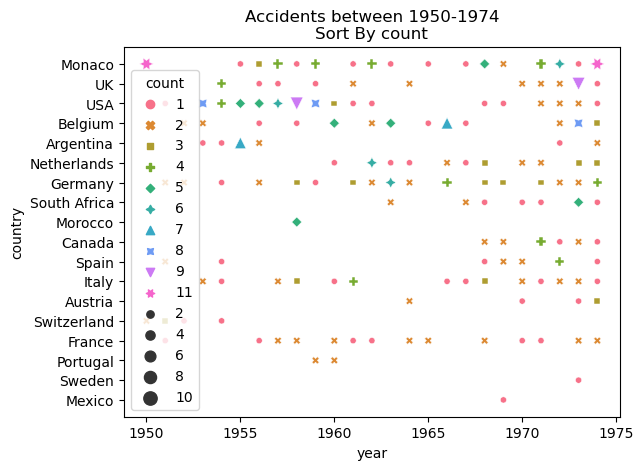

In [74]:
accident_func(accident.loc[accident['year'] < 1975], '1950-1974')

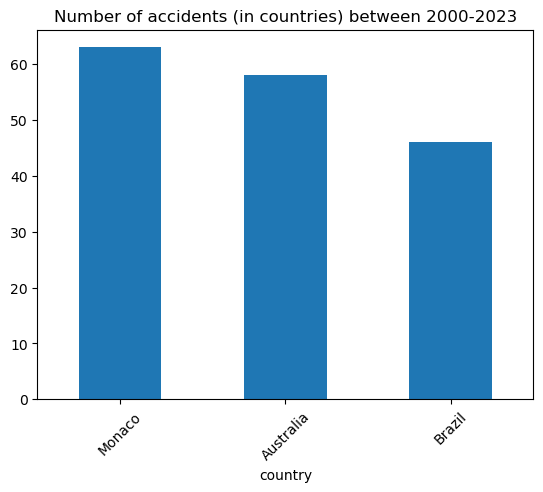

In [75]:
plt.title('Number of accidents (in countries) between 2000-2023')
accident.loc[accident['year'] >= 2000]['country'].value_counts().head(3).plot(kind="bar")
plt.xticks(rotation=45)
plt.show()

/var/folders/dq/lfhw90y53plczdyg_s9ch5q40000gn/T/ipykernel_25873/2647308781.py:6: UserWarning: 
The palette list has fewer values (10) than needed (13) and will cycle, which may produce an uninterpretable plot.
  sns.scatterplot(data=acc_df,


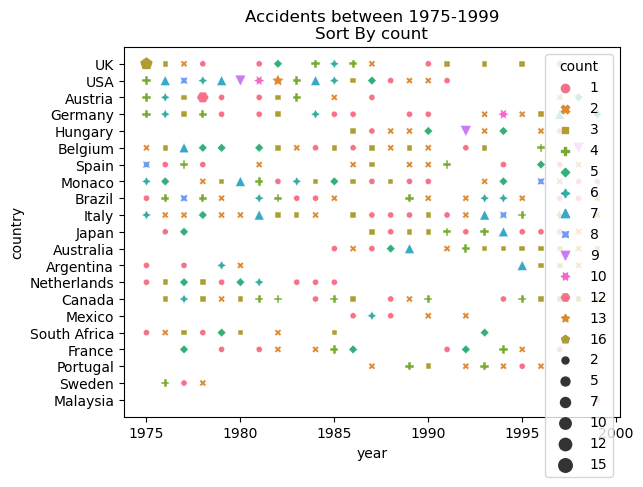

In [76]:
accident_func(accident.loc[(accident['year'] >= 1975) & (accident['year'] < 2000)], '1975-1999')

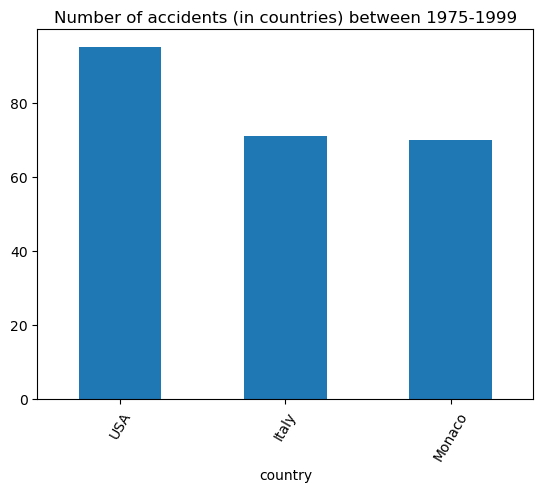

In [77]:
plt.title('Number of accidents (in countries) between 1975-1999')
accident.loc[(accident['year'] >= 1975) & (accident['year'] < 2000)]['country'].value_counts().head(3).plot(kind="bar")
plt.xticks(rotation=60)
plt.show()

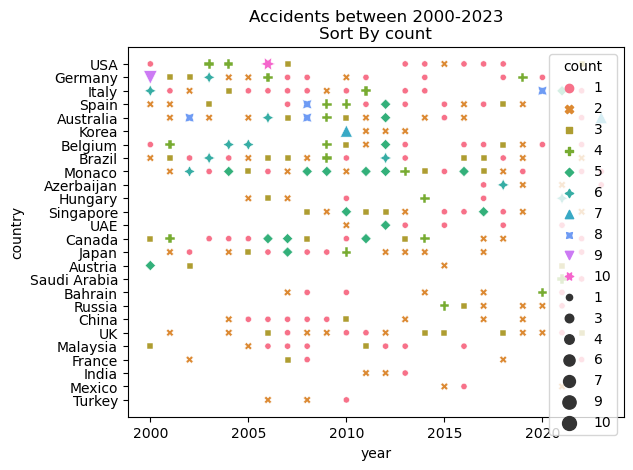

In [78]:
accident_func(accident.loc[accident['year'] >= 2000], '2000-2023')

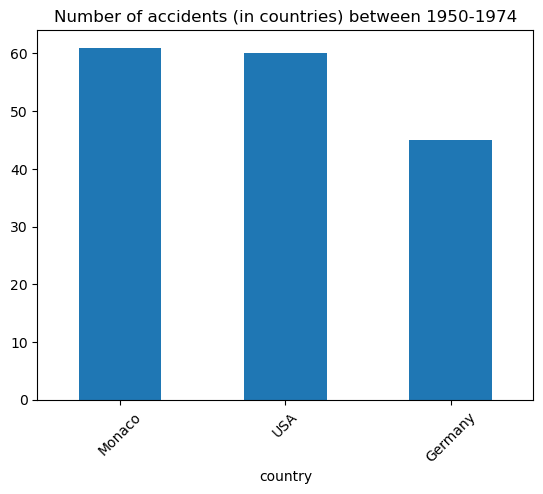

In [79]:
plt.title('Number of accidents (in countries) between 1950-1974')
accident.loc[accident['year'] < 1975]['country'].value_counts().head(3).plot(kind="bar", )
plt.xticks(rotation=45)
plt.show()

In [80]:
accident_1950 = accident.loc[accident['year'] < 1975]
# accident_76_00_df = accident_1950['country'].replace(value='USA', to_replace='United States').value_counts().reset_index()
# accident_1950[['year', 'country','location','raceId']]#['year'].unique()
accident_1950 = accident_1950.groupby(['year'])['country'].value_counts().reset_index().sort_values(by='country', ascending=False)
accident_1950#.info()

,year,country,count
152,1974,USA,1
10,1953,USA,8
22,1955,USA,5
115,1971,USA,2
133,1973,USA,2
...,...,...,...
20,1954,Argentina,1
21,1955,Argentina,7
127,1972,Argentina,1
146,1974,Argentina,2


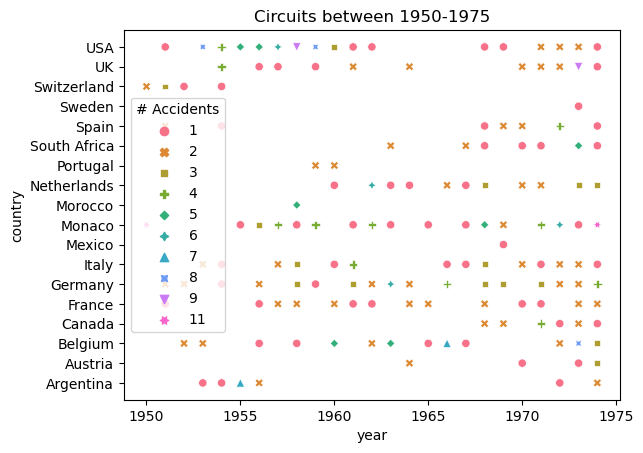

In [81]:
sns.scatterplot(data=accident_1950,
                x='year',
                y='country',
                palette=sns.color_palette('husl', 10),
                # sizes=(20,100),
                # size='count',
                hue='count',
                style='count'
)
# sns.color_palette('pastel')
plt.legend(loc='best', title ='# Accidents')
plt.title('Circuits between 1950-1975')
plt.show()

In [82]:
accident_1950 = accident.loc[accident['year'] < 1975]
accident_76_00_df = accident_1950['country'].replace(value='USA', to_replace='United States').value_counts().reset_index()
accident_1950[['year', 'country','location','raceId']]#['year'].unique()
accident_1950 = accident_1950.groupby(['year'])['country'].value_counts().reset_index().sort_values(by='country', ascending=False)
accident_1950#.info()

,year,country,count
152,1974,USA,1
10,1953,USA,8
22,1955,USA,5
115,1971,USA,2
133,1973,USA,2
...,...,...,...
20,1954,Argentina,1
21,1955,Argentina,7
127,1972,Argentina,1
146,1974,Argentina,2


<Axes: xlabel='country'>

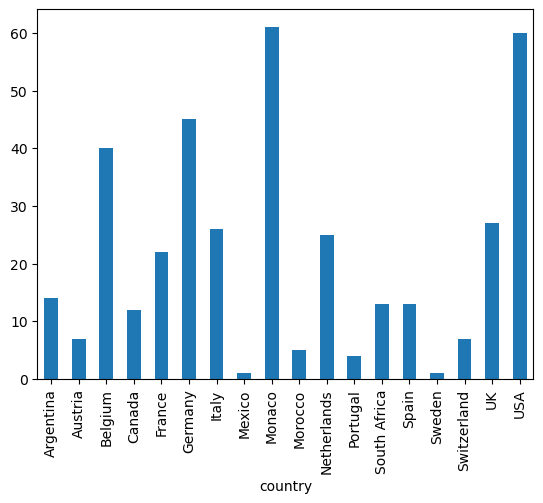

In [83]:
accident_1950.groupby('country')['count'].sum().plot(kind='bar')
# accident_1950.plot(x='country', y='count',kind='barh')

## Second Era Accidents

In [84]:
accident_76_00 = accident.loc[(accident['year'] >= 1975)&(accident['year'] <= 2000)]
accident_76_00_df = accident_76_00['country'].replace(value='USA', to_replace='United States').value_counts().reset_index()
accident_76_00[['year', 'country','location','raceId']]#['year'].unique()
accident_76_00 = accident_76_00.groupby(['year'])['country'].value_counts().reset_index().sort_values(by='country', ascending=False)
accident_76_00#.info()

,year,country,count
278,2000,USA,1
12,1976,USA,7
54,1979,USA,7
66,1980,USA,9
26,1977,USA,8
...,...,...,...
244,1997,Argentina,3
260,1998,Argentina,2
72,1980,Argentina,2
221,1995,Argentina,7


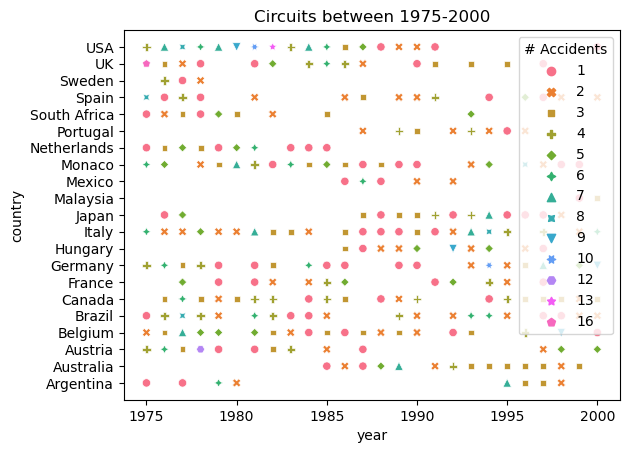

In [85]:
sns.scatterplot(data=accident_76_00,
                x='year',
                y='country',
                palette=sns.color_palette('husl', 13),
                # sizes=(20,100),
                # size='count',
                hue='count',
                style='count'
)
# sns.color_palette('pastel')
plt.legend(loc='best', title ='# Accidents')
plt.title('Circuits between 1975-2000')
plt.show()

<Axes: xlabel='country'>

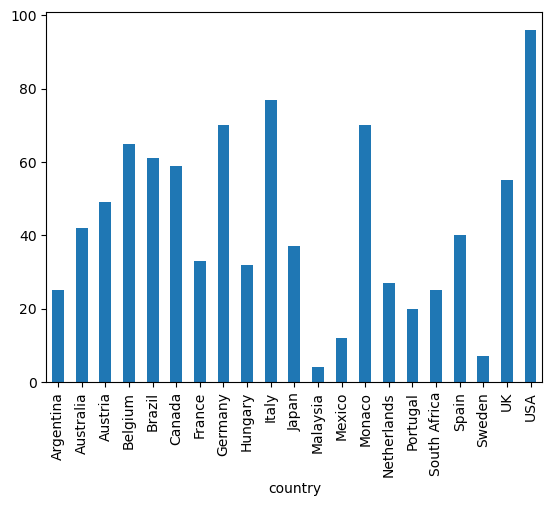

In [86]:
accident_76_00.groupby('country')['count'].sum().plot(kind='bar')


# After 2000 Accident

In [87]:
accident_2000 = accident.loc[accident['year'] >= 2000]
accident_2000_df = accident_2000['country'].replace(value='USA', to_replace='United States').value_counts().reset_index()
accident_2000[['year', 'country','location','raceId']]#['year'].unique()
accident_2000 = accident_2000.groupby(['year'])['country'].value_counts().reset_index().sort_values(by='country', ascending=False)
accident_2000#.info()

,year,country,count
55,2006,USA,10
7,2000,USA,1
172,2014,USA,1
214,2018,USA,1
29,2003,USA,4
...,...,...,...
169,2014,Australia,2
56,2006,Australia,6
101,2009,Australia,4
182,2015,Australia,1


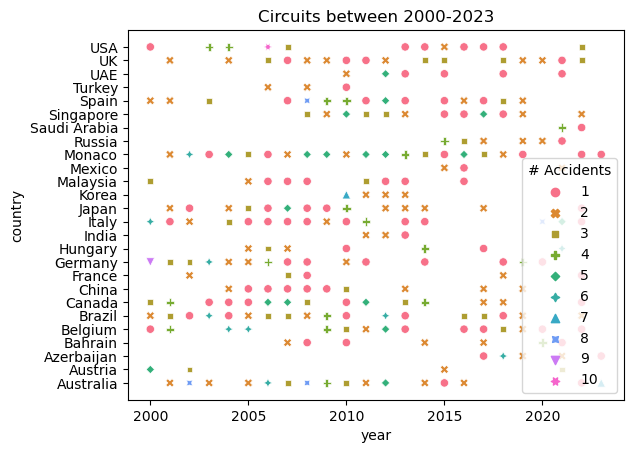

In [88]:
sns.scatterplot(data=accident_2000,
                x='year',
                y='country',
                palette=sns.color_palette('husl', 10),
                # sizes=(20,100),
                # size='count',
                hue='count',
                style='count'
)
# sns.color_palette('pastel')
plt.legend(loc='best', title ='# Accidents')
plt.title('Circuits between 2000-2023')
plt.show()

<Axes: xlabel='country'>

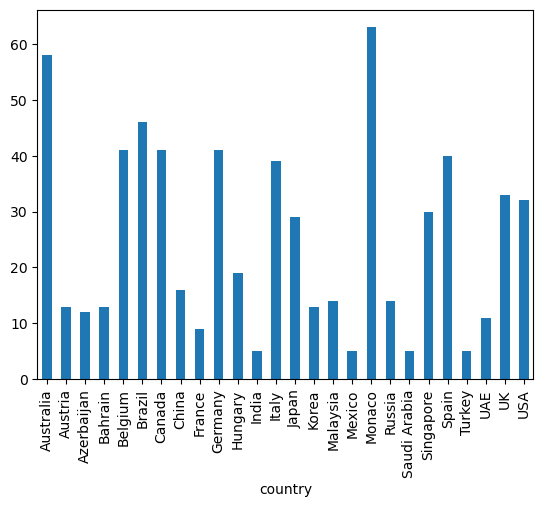

In [89]:
accident_2000.groupby('country')['count'].sum().plot(kind='bar')


In [90]:
print(drivers.shape)
drivers.sample() # driverId forename surname nationality

(857, 9)


,driverId,driverRef,number,code,forename,surname,dob,nationality,url
340,341,surtees,\N,\N,John,Surtees,1934-02-11,British,http://en.wikipedia.org/wiki/John_Surtees


In [91]:
print(race.shape)
race.sample() # raceId	year circuitId	name date

(1101, 18)


,raceId,year,round,circuitId,name,date,time,url,fp1_date,fp1_time,fp2_date,fp2_time,fp3_date,fp3_time,quali_date,quali_time,sprint_date,sprint_time
985,998,2018,10,9,British Grand Prix,2018-07-08,13:10:00,http://en.wikipedia.org/wiki/2018_British_Gran...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N


In [92]:
print(result.shape)
result.sample() # resultId	raceId	driverId constructorId points

(26080, 18)


,resultId,raceId,driverId,constructorId,number,grid,position,positionText,positionOrder,points,laps,time,milliseconds,fastestLap,rank,fastestLapTime,fastestLapSpeed,statusId
19273,19274,801,554,128,12,7,\N,R,10,0.0,12,\N,\N,\N,\N,\N,\N,22


# Drivers Age

In [93]:
driver_and_result = pd.merge(drivers, result, on='driverId')
main = pd.merge(driver_and_result, race, on='raceId')
main.columns

Index(['driverId', 'driverRef', 'number_x', 'code', 'forename', 'surname',
       'dob', 'nationality', 'url_x', 'resultId', 'raceId', 'constructorId',
       'number_y', 'grid', 'position', 'positionText', 'positionOrder',
       'points', 'laps', 'time_x', 'milliseconds', 'fastestLap', 'rank',
       'fastestLapTime', 'fastestLapSpeed', 'statusId', 'year', 'round',
       'circuitId', 'name', 'date', 'time_y', 'url_y', 'fp1_date', 'fp1_time',
       'fp2_date', 'fp2_time', 'fp3_date', 'fp3_time', 'quali_date',
       'quali_time', 'sprint_date', 'sprint_time'],
      dtype='object')

In [94]:
short_main = main[['driverId', 'forename', 'surname', 'date', 'dob', 'points', 'raceId']]
short_main

,driverId,forename,surname,date,dob,points,raceId
0,1,Lewis,Hamilton,2008-03-16,1985-01-07,10.0,18
1,2,Nick,Heidfeld,2008-03-16,1977-05-10,8.0,18
2,3,Nico,Rosberg,2008-03-16,1985-06-27,6.0,18
3,4,Fernando,Alonso,2008-03-16,1981-07-29,5.0,18
4,5,Heikki,Kovalainen,2008-03-16,1981-10-19,4.0,18
...,...,...,...,...,...,...,...
26075,774,Eugène,Chaboud,1950-06-18,1907-04-12,0.0,837
26076,780,Toni,Branca,1950-06-18,1916-09-15,0.0,837
26077,785,Geoff,Crossley,1950-06-18,1921-05-11,0.0,837
26078,786,Luigi,Fagioli,1950-06-18,1898-06-09,6.0,837


In [95]:
short_main['age'] = (short_main['date'] - short_main['dob']) / pd.Timedelta(days=365)
short_main.groupby('driverId')[['age']].min().sort_values('age', ascending=True)

/var/folders/dq/lfhw90y53plczdyg_s9ch5q40000gn/T/ipykernel_25873/886289534.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  short_main['age'] = (short_main['date'] - short_main['dob']) / pd.Timedelta(days=365)


,age
driverId,
830,17.465753
452,18.158904
840,18.419178
846,19.353425
153,19.356164
...,...
442,52.416438
750,52.835616
760,52.936986


In [96]:
filt = short_main.loc[short_main['points'] != 0]
indeces = filt.groupby('driverId')['age'].idxmin()
pointed_drivers = short_main.loc[indeces].sort_values('points')
pointed_drivers

,driverId,forename,surname,date,dob,points,raceId,age
20422,275,Lella,Lombardi,1975-04-27,1941-03-26,0.5,579,34.109589
12743,81,Gianni,Morbidelli,1991-11-03,1968-01-13,0.5,320,23.821918
19220,119,Riccardo,Patrese,1977-10-23,1954-04-17,1.0,559,23.534247
26036,794,Joie,Chitwood,1950-05-30,1912-04-14,1.0,835,38.150685
17908,117,Alain,Prost,1980-01-13,1955-02-24,1.0,498,24.901370
...,...,...,...,...,...,...,...,...
26048,642,Nino,Farina,1950-05-13,1906-10-30,9.0,833,43.564384
23680,394,Giancarlo,Baghetti,1961-07-02,1934-12-25,9.0,741,26.536986
3315,831,Felipe,Nasr,2015-03-15,1992-08-21,10.0,926,22.578082
4564,842,Pierre,Gasly,2018-04-08,1996-02-07,12.0,990,22.180822


In [97]:
short_main.groupby('driverId')['date'].min() #Date of first race

driverId
1     2007-03-18
2     2000-03-12
3     2006-03-12
4     2001-03-04
5     2007-03-18
         ...    
854   2021-03-28
855   2022-03-20
856   2022-09-11
857   2023-03-05
858   2023-03-05
Name: date, Length: 857, dtype: datetime64[ns]

In [98]:
part = pointed_drivers.loc[pointed_drivers['date'] < '1975']
part
# sns.scatterplot(data=accident_76_00,
#                 x='year',
#                 y='country',
#                 palette=sns.color_palette('husl', 13),
#                 # sizes=(20,100),
#                 # size='count',
#                 hue='count',
#                 style='count'
# )
# # sns.color_palette('pastel')
# plt.legend(loc='best', title ='# Accidents')
# plt.title('Circuits between 1975-2000')
# plt.show()

,driverId,forename,surname,date,dob,points,raceId,age
26036,794,Joie,Chitwood,1950-05-30,1912-04-14,1.0,835,38.150685
25985,774,Eugène,Chaboud,1950-07-02,1907-04-12,1.0,838,43.252055
20746,290,Wilson,Fittipaldi,1973-01-28,1943-12-25,1.0,605,29.115068
20460,221,Patrick,Depailler,1974-01-13,1944-08-09,1.0,590,29.449315
20958,298,Gijs,van Lennep,1973-07-29,1942-03-16,1.0,614,31.391781
...,...,...,...,...,...,...,...,...
25852,766,Lee,Wallard,1951-05-30,1910-09-07,9.0,826,40.753425
25407,579,Juan,Fangio,1950-05-21,1911-06-24,9.0,834,38.934247
26017,593,Johnnie,Parsons,1950-05-30,1918-07-04,9.0,835,31.926027
26048,642,Nino,Farina,1950-05-13,1906-10-30,9.0,833,43.564384


In [99]:
def age_splits(part, years):
    df = part
    sns.scatterplot(data=df,
                    x='date',
                    y='age',
                    # palette=sns.color_palette('husl'),
                    # sizes=(20,100),
                    # size='points',
                    # hue='',
                    # style='points'
    )
    # sns.color_palette('pastel')
    # plt.legend(loc='best', title ='# Accidents')
    plt.title(f"The Age of Drivers' First Points Between {years}")
    plt.xlabel('Years')
    plt.ylabel('Age For First Point')
    plt.tight_layout()
    plt.show()

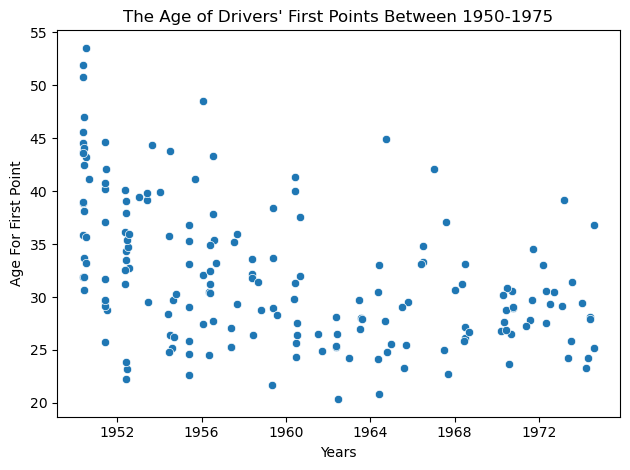

In [100]:
age_splits(pointed_drivers.loc[pointed_drivers['date'] < '1975'], '1950-1975')

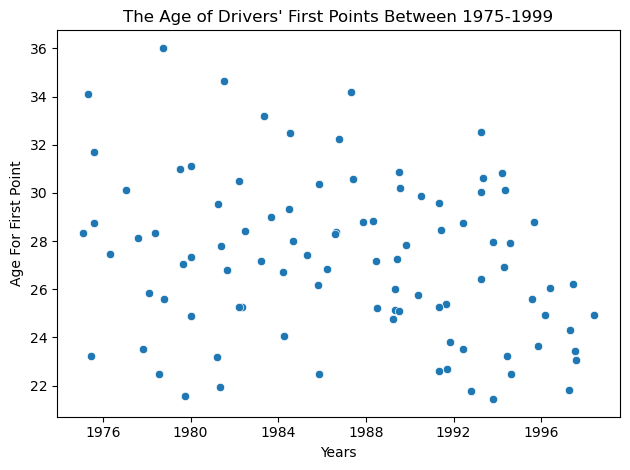

In [101]:
age_splits(pointed_drivers.loc[(pointed_drivers['date'] > '1975') & (pointed_drivers['date'] <= '1999')], '1975-1999')

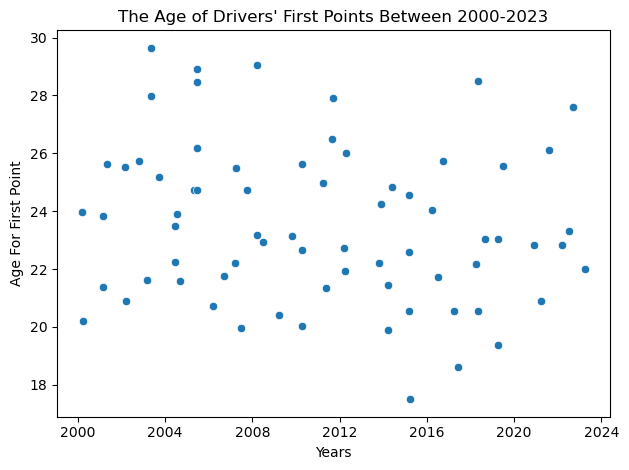

In [102]:
age_splits(pointed_drivers.loc[pointed_drivers['date'] >= '2000'], '2000-2023')

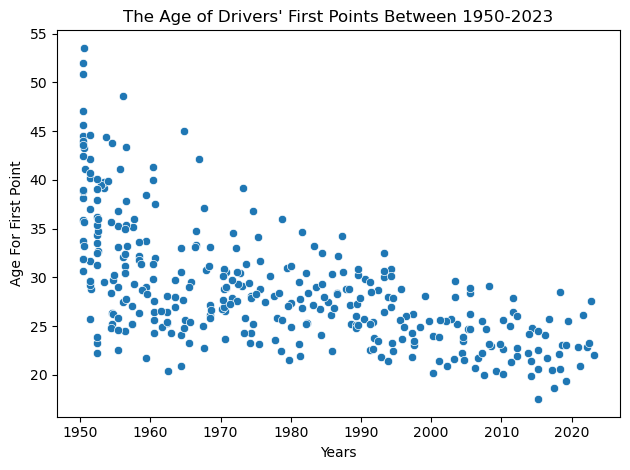

In [103]:
age_splits(pointed_drivers, '1950-2023')

<Axes: xlabel='year', ylabel='country'>

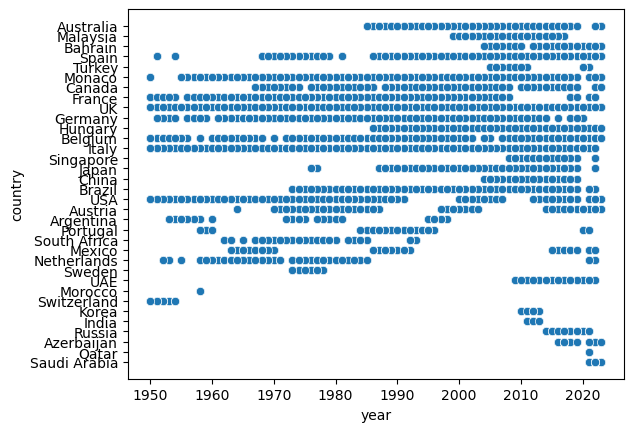

In [104]:
sns.scatterplot(data=circuits_by_country_df,
                    x='year',
                    y='country',
                    # palette=sns.color_palette('husl'),
                    # sizes=(20,100),
                    # size='points',
                    # hue='',
                    # style=''
    )